<a href="https://colab.research.google.com/github/DAHYUN-HAN/Machine_Learning/blob/master/Ch04_ML_Training_Models_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

이게 진짜 중요. 읽어보시길 바라고, bias랑 variance 개념 파악
# Regularized Linear Models
regularization : 모델을 단순화 시키거나, 모델에서 기억해야 할 파라미터의 수를 줄이거나. 피처와 모델의 파라미터는 그대로 두는데 학습할 때 데이터를 정확하게 측정할 수 있도록 만들면서 그 파라미터들이 가급적 작은 수(0)를 가지도록 유도. 노드를 단순하게 함. 데이터도 맞추면서 가급적 모델이 단순하도록.

As we saw in Chapters 1 and 2, *a good way to reduce overfitting* is to **regularize the model** (i.e., to constrain it): 
* the fewer degrees of freedom it has, 자유도를 낮춰줌.
* the harder it will be for it to overfit the data. 

A simple way to regularize a polynomial model is *to reduce the number of polynomial degrees*.

For a linear model, regularization is typically achieved **by constraining the weights of the model**. 

We will now look at **Ridge** Regression, **Lasso** Regression, and **Elastic Net**, which implement three different ways to constrain the weights.

기계학습에서 많이 쓰는건 L1, L2 norm p-norm은 sparse한 벡터.  
sparse를 만들기 위해서 가장 강한건 L0. 다음1, 2.. P가 작아지면 sparse하다.  

cost function은 미분 가능해야 함.  
절댓값은 미분이 불가능하기 때문에 L0와 L1은 미분이 불가능하게 됨. 그래서 따로 처리가 필요.  
그런데 L2norm은 미분이 자동으로 되는 형태.

하이퍼파라미터 : 모델 내부 요소; 파라키너 모델 외적 요소: 하이퍼 파라미터 ex)알고리즘, 알파값.  
알파가 엄청 크면 모든 중요 가치는 파라미터 수가 적은 걸로 넘어간다. 그럼 다 죽이기 시작. 파라미터가 100만개가 있었는데 이런것들을 다 0으로 만들고 남는 것들은 얼마 없어서 모델이 너무 단순해져서 bias값만 보정하는 형태로 위아래로만 움직이게 됨.

반대로 0으로 두면 costfunction이 mse만 남게 되면 그냥 liner regression.  
알파는 하이퍼파라미터로써 성능을 결정하는데 사람이 하나하나 찾아줘야 하는 경우가 생김. grid search라던지 편하게 자동화 시킴. 0~300백만 까지 해 놓고 하나하나 다 찾는거? 아직도 경험적인 방법으로 구분하기 때문에 이거 튜닝을 잘 하는건 경험이 좀 필요하고, 이 분야에 능숙한지를 결정짓는 단서가 되기도 함.

In [0]:
import numpy as np

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100)

In [2]:
X_new.shape

(100,)

In [3]:
X_new=X_new.reshape(100,1)
X_new.shape

(100, 1)

## Ridge Regression

**Ridge** Regression (also called **Tikhonov** regularization) is a regularized version of Linear Regression: 
* a regularization term equal to $\alpha \sum_{i=1}^n \theta_i^2$ is added to the cost function. 

This forces the learning algorithm to not only 
* fit the data but also 
* keep **the model weights as small** as possible. 

> 파라메터들을 균등하게 작게 유지하면서 데이터에 맞춤.

Note that the regularization term should only be added to the cost function during training. 
Once the model is trained, you want to use the unregularized performance measure to evaluate the model’s performance.

> ### NOTE
>
> It is quite common for the cost function used during training to be different from the performance measure used for testing. Apart from regularization, another reason they might be different is that a good training cost function should have optimization-friendly derivatives, while the performance measure used for testing should be as close as possible to the final objective. For example, classifiers are often trained using a cost function such as the log loss (discussed in a moment) but evaluated using precision/recall.

The hyperparameter $\alpha$ controls how much you want to regularize the model. If $\alpha=0$, then Ridge Regression is just **Linear Regression**. If $\alpha$ is very large, then **all weights end up very close to zero** and the result is a flat line going through the data’s mean. Equation 4-8 presents the Ridge Regression cost function.

### Equation 4-8. Ridge Regression cost function

$$
J(\boldsymbol{\theta})=\text{MSE}(\boldsymbol{\theta})+\alpha \frac{1}{2}\sum_{i=1}^n \theta_i^2
$$

Note that **the bias term $\theta_0$ is not regularized** (the sum starts at i = 1, not 0). 

If we define $\textbf{w}$ as the vector of feature weights ($\theta_1$ to $\theta_n$), then the regularization term is equal to $\frac{1}{2}(||\textbf{w}||_2)^2$, where $||\textbf{w}||_2$ represents the $l2$ norm of the weight vector. For Gradient Descent, just add $\alpha \textbf{w}$ to the MSE gradient vector (Equation 4-6).

> ### WARNING
>릿지 회귀의 특징은 MSE와 L2를 같이 고려함. 만약에 0부터 100까지 점수가 나올 수 있는 곳에서 MSE이라고 하고, 0~10 까지에서 MSE라고 하면 같은 값이 영향을 미치는게 다르게 됨. 대부분의 gradient decnet를 쓴다고 하면 모든 데이터들의 스케일을 맞춰주게 된다.   
> It is important to scale the data (e.g., using a **StandardScaler**) before performing Ridge Regression, as it is sensitive to the scale of the input features. This is true of most regularized models.

Figure 4-17 shows several Ridge models trained on some linear data using different α values. On the left, plain Ridge models are used, leading to linear predictions. On the right, the data is first expanded using `PolynomialFeatures(degree=10)`, then it is scaled using a `StandardScaler`, and finally the Ridge models are applied to the resulting features: this is Polynomial Regression with Ridge regularization. Note how increasing α leads to flatter (i.e., less extreme, more reasonable) predictions, thus reducing the model’s variance but increasing its bias.




As with Linear Regression, we can perform Ridge Regression either by computing a closed-form equation or by performing Gradient Descent. The pros and cons are the same. Equation 4-9 shows the closed-form solution, where $\textbf{A}$ is the $(n + 1) \times (n + 1)$ *identity matrix*, except with a 0 in the top-left cell, corresponding to the bias term.

### Equation 4-9. Ridge Regression closed-form solution

$$
\hat{\boldsymbol{\theta}} = ({\textbf{X}^{\text{T}}\textbf{X}+ \alpha \textbf{A})^{-1} \textbf{X}^{\text{T}}}\textbf{y}
$$

Here is how to perform Ridge Regression with **Scikit-Learn using a closed-form solution** (a variant of Equation 4-9 that uses a matrix factorization technique by André-Louis Cholesky):


In [4]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)#cloased-form
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [5]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

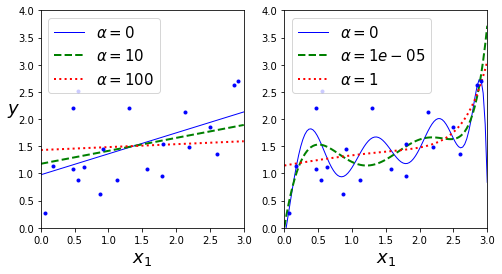

In [6]:
from sklearn.linear_model import Ridge,LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
import matplotlib.pyplot as plt

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, 
                 y_new_regul, 
                 style, 
                 linewidth=lw, 
                 label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.title("ridge_regression_plot")
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)


plt.show()

And using Stochastic Gradient Descent:

In [8]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

The `penalty` hyperparameter sets **the type of regularization term to use**. 
* Specifying **"l2"** indicates that you want SGD to add a regularization term to the cost function equal to half the square of **the $l2$ norm** of the weight vector:
* this is simply **Ridge Regression**.

## Lasso Regression

***Least Absolute Shrinkage and Selection Operator Regression*** (usually simply called **Lasso Regression**) is another regularized version of Linear Regression: 
* just like **Ridge Regression**, it adds a regularization term to the cost function, 
* but it uses **the $l1$ norm** of the weight vector instead of half the square of the $l2$ norm (see Equation 4-10).

### Equation 4-10. Lasso Regression cost function

$$
J(\boldsymbol{\theta})=\text{MSE}(\boldsymbol{\theta})+\alpha \sum_{i=1}^n |\theta_i|
$$

Figure 4-18 shows the same thing as Figure 4-17 but replaces Ridge models with Lasso models and uses smaller $\alpha$ values.





/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.802867703827423, tolerance: 0.0009294783355207351
  positive)


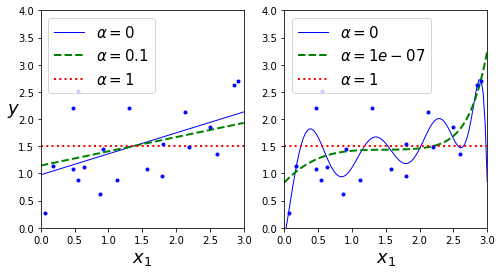

In [9]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.title("lasso_regression_plot")
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)


plt.show()

Figure 4-18. A linear model (left) and a polynomial model (right), both using various levels of Lasso regularization

**An important characteristic** of **Lasso Regression** is that it tends to **eliminate the weights of the least important features (i.e., set them to zero)**. 
> 매우 sparse한 weight를 가진 model 만들어냄.

For example, the dashed line in the righthand plot in Figure above (with $\alpha=10^{-7}$) looks quadratic, almost linear: **all the weights for the high-degree polynomial features are equal to zero**. In other words, **Lasso Regression automatically performs feature selection and outputs a *sparse* model** (i.e., with few nonzero feature weights).

You can get a sense of why this is the case by looking at Figure below: 
* the axes represent two model parameters, and 
* the background contours represent different loss functions. 

In the top-left plot, the contours represent the $l1$ loss ($|\theta_1| + |\theta_2|$), which drops linearly as you get closer to any axis. 
* For example, if you initialize the model parameters to $\theta_1=2$ and $\theta_2=0.5$, running Gradient Descent will decrement both parameters equally (as represented by the dashed yellow line); 
* therefore $\theta_2$ will reach $0$ first (since it was closer to $0$ to begin with). 
* After that, Gradient Descent will roll down the gutter(배수로, 홈통) until it reaches $\theta_1 = 0$ (with a bit of bouncing around, since the gradients of $l1$ never get close to $0$: they are either $–1$ or $1$ for each parameter). 

In the top-right plot, the contours represent **Lasso’s cost function** (i.e., an MSE cost function plus an $l1$ loss). 
* The small white circles show the path that Gradient Descent takes to optimize some model parameters that were initialized around $\theta_1=0.25$ and $\theta_2=-1$: 
* notice once again how the path quickly reaches $\theta_2=0$, then rolls down the gutter and ends up bouncing around the global **optimum** (represented by **the red square**).
* If we increased $\alpha$, the global optimum would move left along the dashed yellow line, while if we decreased $\alpha$, the global optimum would move right
* (in this example, the optimal parameters for the unregularized MSE are $\theta_1=2$ and $\theta_2=0.5$).

L1 penalty 등고선과 직각으로 움직임. L2는 같이 줄어드는 방식으로 움직임.

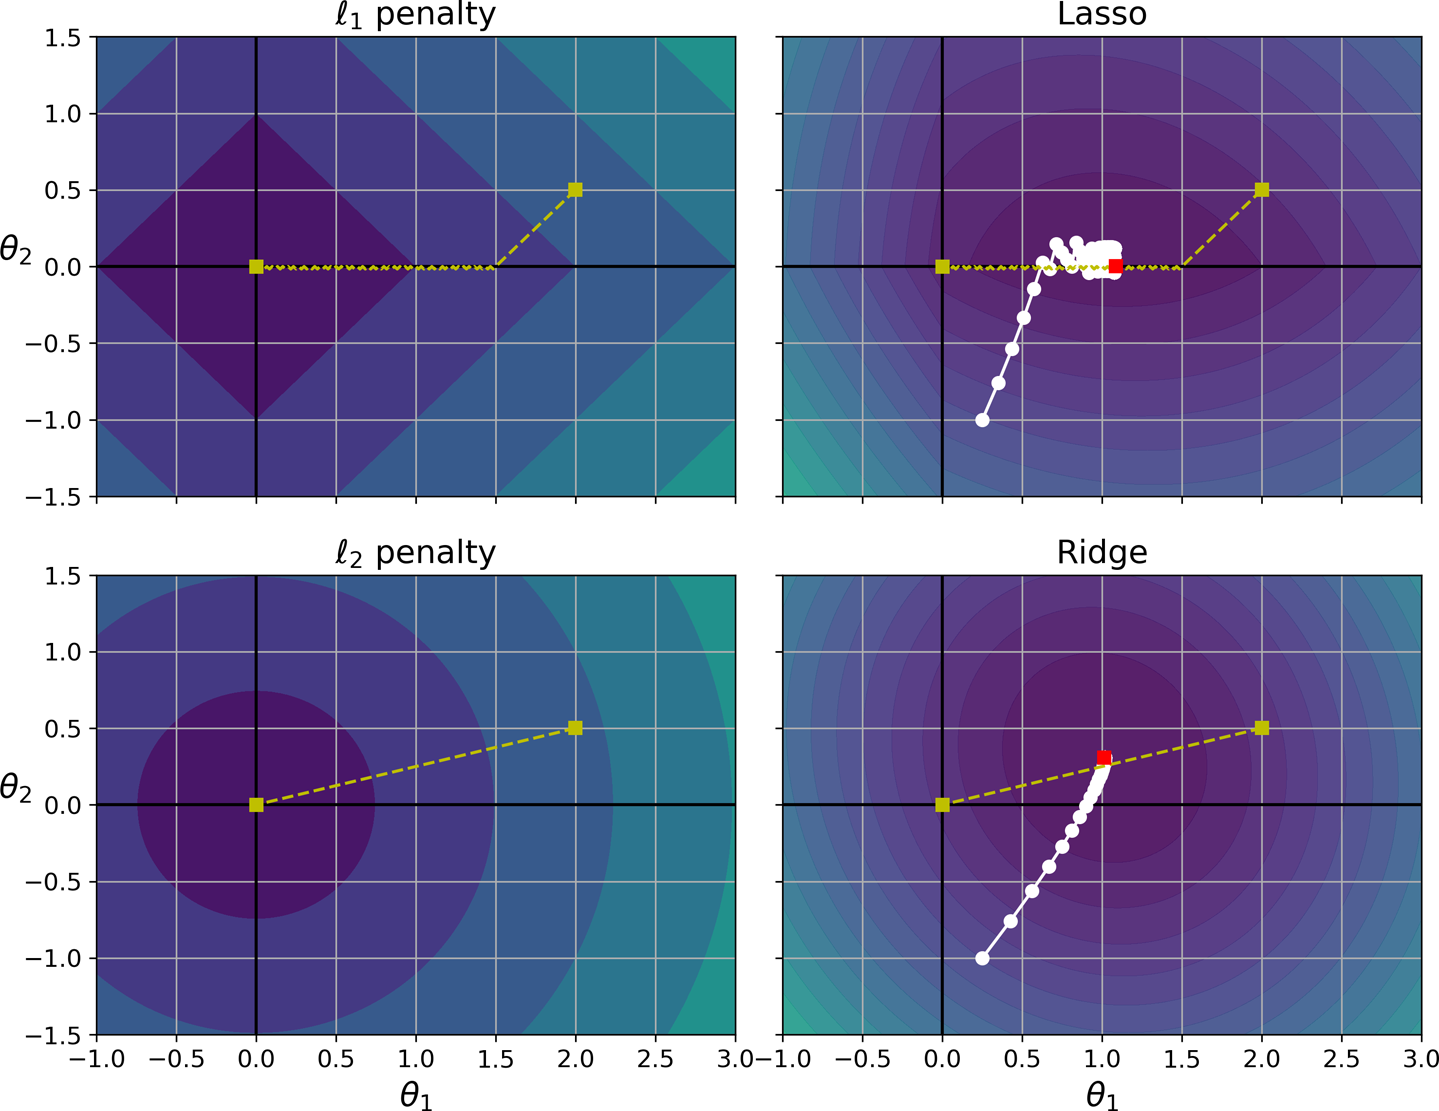

Figure 4-19. Lasso versus Ridge regularization

The two bottom plots show the same thing but with an $l2$ penalty instead. 

In the bottom-left plot, you can see that the $l2$ loss decreases with the distance to the origin, so Gradient Descent just takes a straight path toward that point. 

In the bottom-right plot, the contours represent **Ridge Regression’s cost function** (i.e., an MSE cost function plus an $l2$ loss). 

There are two main differences with Lasso. 
* First, the gradients get smaller as the parameters approach the global optimum, so Gradient Descent naturally **slows down**, which helps convergence (as there is no bouncing around). 
* Second, the optimal parameters (represented by the red square) **get closer and closer to the origin** when you increase $\alpha$, but they never get eliminated entirely.

> ### TIP
>
> To avoid Gradient Descent from **bouncing around the optimum at the end when using Lasso**, you need to **gradually reduce the learning rate** during training (it will still bounce around the optimum, but the steps will get smaller and smaller, so it will converge).

The Lasso cost function is not differentiable at $\theta_i = 0$ (for $i = 1, 2, ⋯, n$), but Gradient Descent still works fine if you use a **subgradient vector** $g$ instead when any $\theta_i=0$. Equation 4-11 shows a subgradient vector equation you can use for Gradient Descent with the Lasso cost function.

### Equation 4-11. Lasso Regression subgradient vector

$$
g(\boldsymbol{\theta},J) = \nabla_\boldsymbol{\theta} \text{MSE}(\boldsymbol{\theta}) +\alpha \left( \begin{matrix}
\text{sign}(\theta_1)\\
\text{sign}(\theta_2)\\
\vdots\\
\text{sign}(\theta_n)
\end{matrix}
\right)
\text{  where } \text{sign}(\theta_i) = \left\{\begin{matrix}
-1 & \text{ if } \theta_i<0 \\
0 & \text{ if } \theta_i=0 \\
+1 & \text{ if } \theta_i>0 \\
\end{matrix}
\right.
$$


Here is a small Scikit-Learn example using the Lasso class:


In [10]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

Note that you could instead use `SGDRegressor(penalty="l1")`.

## Elastic Net
**Elastic Net** is a **middle ground(중간지점!)** between **Ridge** Regression and **Lasso** Regression. 

The regularization term is **a simple mix of both Ridge and Lasso’s regularization terms**, and you can control **the mix ratio** $r$. 

When $r = 0$, **Elastic Net is equivalent to Ridge Regression**, and when $r = 1$, it is equivalent to **Lasso Regression** (see Equation 4-12).

### Equation 4-12. Elastic Net cost function

$$
J(\boldsymbol{\theta})=\text{MSE}(\boldsymbol{\theta})+r\alpha \sum_{i=1}^n |\theta_i|+\frac{1-r}{2}\alpha \sum_{i=1}^n \theta_i^2
$$

So when should you use **plain Linear Regression** (i.e., without any regularization), **Ridge, Lasso, or Elastic Net**? 

* It is almost always preferable to have **at least a little bit of regularization**, so generally you should avoid plain Linear Regression. 
* **Ridge** is a good default,
* but if you suspect that **only a few features are useful**, you should prefer **Lasso** or Elastic Net
   * because they tend to reduce the useless features’ weights down to zero, as we have discussed. 

In general, **Elastic Net** is preferred over **Lasso** * because Lasso may behave erratically(변덕스럽게) 
* when **the number of features is greater than the number of training instances** or 
* when **several features are strongly correlated**.

Here is a short example that uses Scikit-Learn’s ElasticNet (`l1_ratio` corresponds to the mix ratio $r$):


In [11]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

## Early Stopping

A very different way **to regularize iterative learning algorithms** such as Gradient Descent is to **stop training as soon as *the validation error* reaches a minimum**. 

This is called **early stopping**. 

Figure below shows a complex model (in this case, a **high-degree Polynomial Regression** model) being trained with **Batch Gradient Descent**. 

* As the epochs go by the algorithm learns, and its prediction error (RMSE) on the training set goes down, along with its prediction error on the validation set. 
* After a while though, the validation error stops decreasing and starts to go back up. 
   * This indicates that **the model has started to overfit the training data**. 
* With **early stopping** you just stop training as soon as the validation error reaches the minimum. 

It is such a simple and efficient regularization technique that **Geoffrey Hinton** called it a **“beautiful free lunch.”**

> ### TIP
>
> With **Stochastic** and **Mini-batch Gradient Descent**, the curves are not so smooth, and it may be hard to know whether you have reached the minimum or not. 
> 
> One solution is 
>* to stop only after **the validation error has been above the minimum for some time** (when you are confident that the model will not do any better), 
>* then **roll back the model parameters to the point where the validation error was at a minimum**.

Here is a basic implementation of early stopping:

In [0]:
from sklearn.model_selection import train_test_split

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [0]:
from sklearn.base import clone
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, 
                       tol=-np.infty, 
                       warm_start=True,
                       penalty=None, 
                       learning_rate="constant", 
                       eta0=0.0005, 
                       random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

Note that with warm_start=True, when the fit() method is called it continues training where it left off, instead of restarting from scratch.

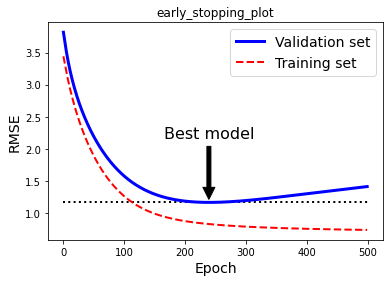

In [14]:
## for chart!

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

#best_val_rmse -= 0.03  # just to make the graph look better

plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.title("early_stopping_plot")
plt.show()

In [15]:
best_epoch, best_model

(239,
 SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
              eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
              learning_rate='constant', loss='squared_loss', max_iter=1,
              n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
              shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
              warm_start=True))